In [9]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import random
import glob
import pickle

data_path = r"D:\Downloads\BrainTumorSegmentation\BraTS2020_training_data\content\data"
print(os.listdir(data_path)[:10])

['meta_data.csv', 'name_mapping.csv', 'survival_info.csv', 'volume_100_slice_0.h5', 'volume_100_slice_1.h5', 'volume_100_slice_10.h5', 'volume_100_slice_100.h5', 'volume_100_slice_101.h5', 'volume_100_slice_102.h5', 'volume_100_slice_103.h5']


In [11]:
data_path = r"D:\Downloads\BrainTumorSegmentation\BraTS2020_training_data\content\data"
print("Files in dataset folder:")
print(os.listdir(data_path)[:10])

# picking one file to inspect
sample_file = os.path.join(data_path, "volume_100_slice_103.h5" )

# open the file
with h5py.File(sample_file, 'r') as f:
    # print all keys inside the file
    print("\nKeys inside this .h5 file:")
    print(list(f.keys()))

    # Access image data 
    image_data = f['image'][:]
    print("\nImage shape:", image_data.shape)
    print("Image data type:", image_data.dtype)

    # Access label/mask data

    if 'mask' in f.keys():
        mask_data = f['mask'][:]
        print("Mask shape: ", mask_data.shape)
    elif 'label' in f.keys():
        mask_data = f['label'][:]
        print("Label shape:", mask_data.shape) 

Files in dataset folder:
['meta_data.csv', 'name_mapping.csv', 'survival_info.csv', 'volume_100_slice_0.h5', 'volume_100_slice_1.h5', 'volume_100_slice_10.h5', 'volume_100_slice_100.h5', 'volume_100_slice_101.h5', 'volume_100_slice_102.h5', 'volume_100_slice_103.h5']

Keys inside this .h5 file:
['image', 'mask']

Image shape: (240, 240, 4)
Image data type: float64
Mask shape:  (240, 240, 3)


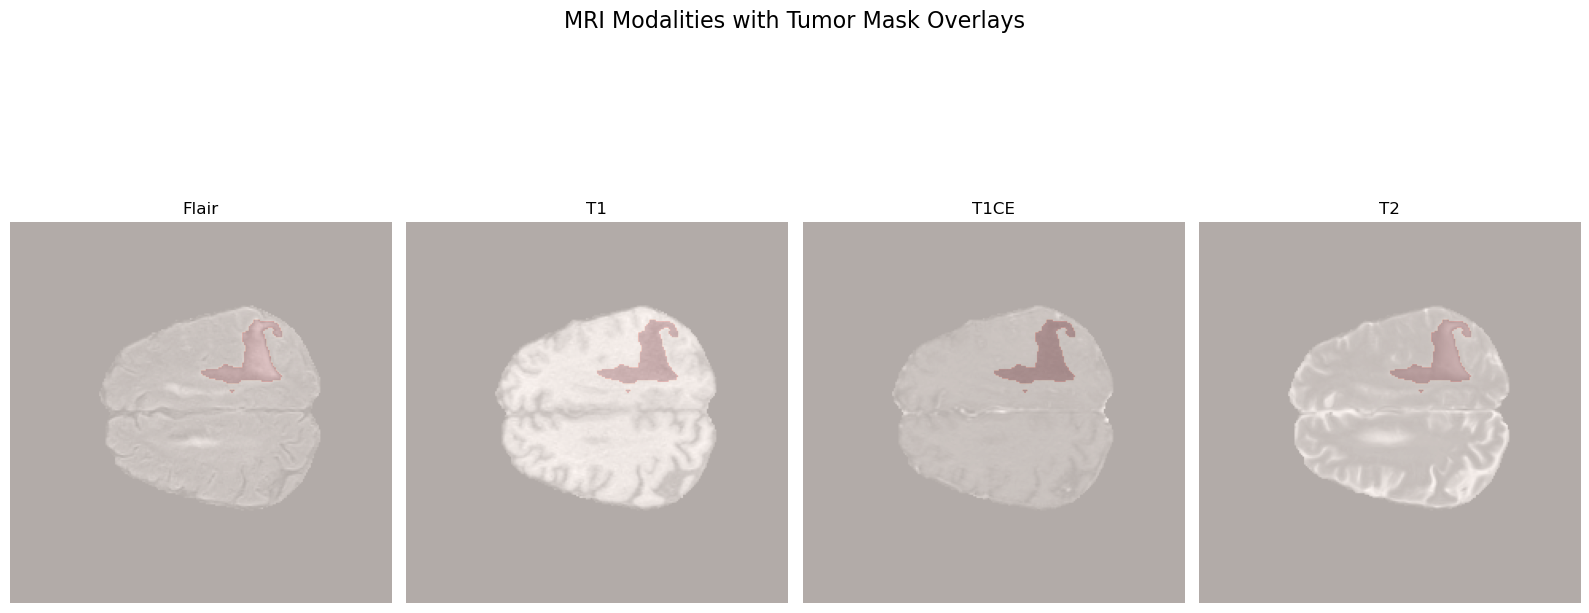

In [13]:
# Path to dataset
data_path = r"D:\Downloads\BrainTumorSegmentation\BraTS2020_training_data\content\data"

# Pick one .h5 file
sample_file = os.path.join(data_path, "volume_100_slice_103.h5")

# open file
with h5py.File(sample_file, 'r') as f:
    image = f['image'][:]
    mask = f['mask'][:]

# modality names for reference
modality_names = ["Flair", "T1", "T1CE", "T2"]
plt.figure(figsize=(16, 8))


for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(image[:, :, i], cmap='gray')
    plt.imshow(mask[:, :, 0], cmap='Reds', alpha=0.4)
    plt.imshow(mask[:, :, 1], cmap='Reds', alpha=0.3)
    plt.imshow(mask[:, :, 2], cmap='Reds', alpha=0.3)
    plt.title(modality_names[i])
    plt.axis("off")

plt.suptitle("MRI Modalities with Tumor Mask Overlays", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
import os
import h5py
import numpy as np

# -------------------------------
# Paths
# -------------------------------
data_path = r"D:\Downloads\BrainTumorSegmentation\BraTS2020_training_data\content\data"
save_path = r"D:\Downloads\BrainTumorSegmebtation\preprocessed_npz"
os.makedirs(save_path, exist_ok=True)

# -------------------------------
# Normalization function
# -------------------------------
def normalize_image(img):
    img_norm = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[-1]):
        channel = img[:, :, i]
        mean = np.mean(channel)
        std = np.std(channel)
        img_norm[:, :, i] = ((channel - mean) / (std + 1e-8)).astype(np.float32)
    return img_norm

# -------------------------------
# Preprocessing loop
# -------------------------------
h5_files = [f for f in os.listdir(data_path) if f.endswith('.h5')]
print(f"Found {len(h5_files)} .h5 files")

valid_files = []
bad_files = []

for idx, file_name in enumerate(h5_files):
    file_path = os.path.join(data_path, file_name)

    try:
        with h5py.File(file_path, 'r') as f:
            image = f['image'][:]
            mask = f['mask'][:]

        # normalize image
        image_norm = normalize_image(image)
        mask = mask.astype(np.uint8)

        # save as compressed npz
        base_name = file_name.replace('.h5', '')
        np.savez_compressed(os.path.join(save_path, f"{base_name}.npz"), 
                            image=image_norm, mask=mask)

        valid_files.append(base_name)

    except Exception as e:
        print(f"⚠️ Skipping {file_name} due to error: {e}")
        bad_files.append(file_name)

    if (idx+1) % 100 == 0:
        print(f"Processed {idx+1}/{len(h5_files)} files")

print("✅ Preprocessing completed!")
print(f"Skipped {len(bad_files)} bad files.")

Found 57195 .h5 files
Processed 100/57195 files
Processed 200/57195 files
Processed 300/57195 files
Processed 400/57195 files
Processed 500/57195 files
Processed 600/57195 files
Processed 700/57195 files
Processed 800/57195 files
Processed 900/57195 files
Processed 1000/57195 files
Processed 1100/57195 files
Processed 1200/57195 files
Processed 1300/57195 files
Processed 1400/57195 files
Processed 1500/57195 files
Processed 1600/57195 files
Processed 1700/57195 files
Processed 1800/57195 files
Processed 1900/57195 files
Processed 2000/57195 files
Processed 2100/57195 files
Processed 2200/57195 files
Processed 2300/57195 files
Processed 2400/57195 files
Processed 2500/57195 files
Processed 2600/57195 files
Processed 2700/57195 files
Processed 2800/57195 files
Processed 2900/57195 files
Processed 3000/57195 files
Processed 3100/57195 files
Processed 3200/57195 files
Processed 3300/57195 files
Processed 3400/57195 files
Processed 3500/57195 files
Processed 3600/57195 files
Processed 3700/

# Perform Splitting(on filenames)

In [18]:
# Path to preprocessed .npz files
data_dir = r"D:\Downloads\BrainTumorSegmebtation\preprocessed_npz"

# get all the npz files
all_files = glob.glob(os.path.join(data_dir, '*.npz'))
print("Total files : ", len(all_files))

#Shuffle for randomness
random.seed(42)
random.shuffle(all_files)

#split ratio
train_split = 0.7
val_split = 0.15
test_split = 0.15

n_total = len(all_files)
n_train = int(train_split*n_total)
n_val = int(val_split*n_total)

#ensuring that the val data is taken after the test has taken the data
train_files = all_files[:n_train]
val_files = all_files[n_train:n_train + n_val]
test_files = all_files[n_train + n_val:]
print(f"Train: {len(train_files)} | Val: {len(val_files)} | Test: {len(test_files)}")

# Save splits for later use
with open(os.path.join(data_dir, 'train_files.pkl'), 'wb') as f:
    pickle.dump(train_files, f)
with open(os.path.join(data_dir, 'val_files.pkl'), 'wb') as f:
    pickle.dump(val_files, f)
with open(os.path.join(data_dir, 'test_files.pkl'), 'wb') as f:
    pickle.dump(test_files, f)

print("✅ Train/Val/Test splits saved.")

Total files :  57195
Train: 40036 | Val: 8579 | Test: 8580
✅ Train/Val/Test splits saved.


In [22]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
   ---------------------------------------- 0.0/619.4 MB ? eta -:--:--
   ---------------------------------------- 1.0/619.4 MB 7.2 MB/s eta 0:01:26
    --------------------------------------- 9.4/619.4 MB 28.0 MB/s eta 0:00:22
   - -------------------------------------- 23.6/619.4 MB 42.7 MB/s eta 0:00:14
   -- ------------------------------------- 38.3/619.4 MB 50.7 MB/s eta 0:00:12
   --- ------------------------------------ 53.0/619.4 MB 54.4 MB/s eta 0:00:11
   --- ------------------------------------ 61.3/619.4 MB 52.1 MB/s eta 0:00:11
   ---- ----------------------------------- 72.4/619.4 MB 51.8 MB/s eta 0:00:11
   ----- ---------------------------------- 83.1/619.4 MB 51.5 MB/s eta 0:00:11
   ------ --------------------------------- 95.7/619.4 MB 52.2 MB/s eta 0:00:11
   ------ -------------------------------- 110.1/619.4 MB 54.1 MB/s eta 0:00:10
   ------- ------------------------------- 123.2/619.4 MB 55.0 MB/s eta 0:0

In [23]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


PyTorch version: 2.8.0+cpu
CUDA available: False


# PyTorch Dataset and DataLoader

In [32]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import pickle

# -------------------------------
# Paths
# -------------------------------
data_dir = r"D:\Downloads\BrainTumorSegmebtation\preprocessed_npz"  # folder with .npz files
splits_dir = r"D:\Downloads\BrainTumorSegmebtation\preprocessed_npz"  # same as where you saved the pkl files
  # folder with saved split lists

# Load train/val/test file lists
with open(os.path.join(splits_dir, "train_files.pkl"), "rb") as f:
    train_files = pickle.load(f)

with open(os.path.join(splits_dir, "val_files.pkl"), "rb") as f:
    val_files = pickle.load(f)

with open(os.path.join(splits_dir, "test_files.pkl"), "rb") as f:
    test_files = pickle.load(f)

print(f"Train: {len(train_files)} | Val: {len(val_files)} | Test: {len(test_files)}")

# -------------------------------
# PyTorch Dataset
# -------------------------------
class BrainTumorTorchDataset(Dataset):
    """
    PyTorch Dataset for Brain Tumor Segmentation using .npz files.
    """
    def __init__(self, data_dir, file_list, transform=None):
        """
        Args:
            data_dir (str): Path to folder containing .npz files
            file_list (list): List of file names to use for this split
            transform (callable, optional): Optional transform to be applied on image/mask
        """
        self.data_dir = data_dir
        self.files = file_list
        self.transform = transform
        print(f"Dataset initialized with {len(self.files)} samples.")

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        
        file_path = self.files[idx] 
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # (C, H, W)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)     # (C_mask, H, W)

        if self.transform:
            image, mask = self.transform(image, mask)

        return image, mask

# -------------------------------
# Create Datasets & DataLoaders
# -------------------------------
batch_size = 4

train_dataset = BrainTumorTorchDataset(data_dir, train_files)
val_dataset = BrainTumorTorchDataset(data_dir, val_files)
test_dataset = BrainTumorTorchDataset(data_dir, test_files)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# -------------------------------
# Example: Check one batch
# -------------------------------
for images, masks in train_loader:
    print("Batch images shape:", images.shape)  # (B, C, H, W)
    print("Batch masks shape:", masks.shape)    # (B, C_mask, H, W)
    break


Train: 40036 | Val: 8579 | Test: 8580
Dataset initialized with 40036 samples.
Dataset initialized with 8579 samples.
Dataset initialized with 8580 samples.
Batch images shape: torch.Size([4, 4, 240, 240])
Batch masks shape: torch.Size([4, 3, 240, 240])


# MRI + tumor overlay


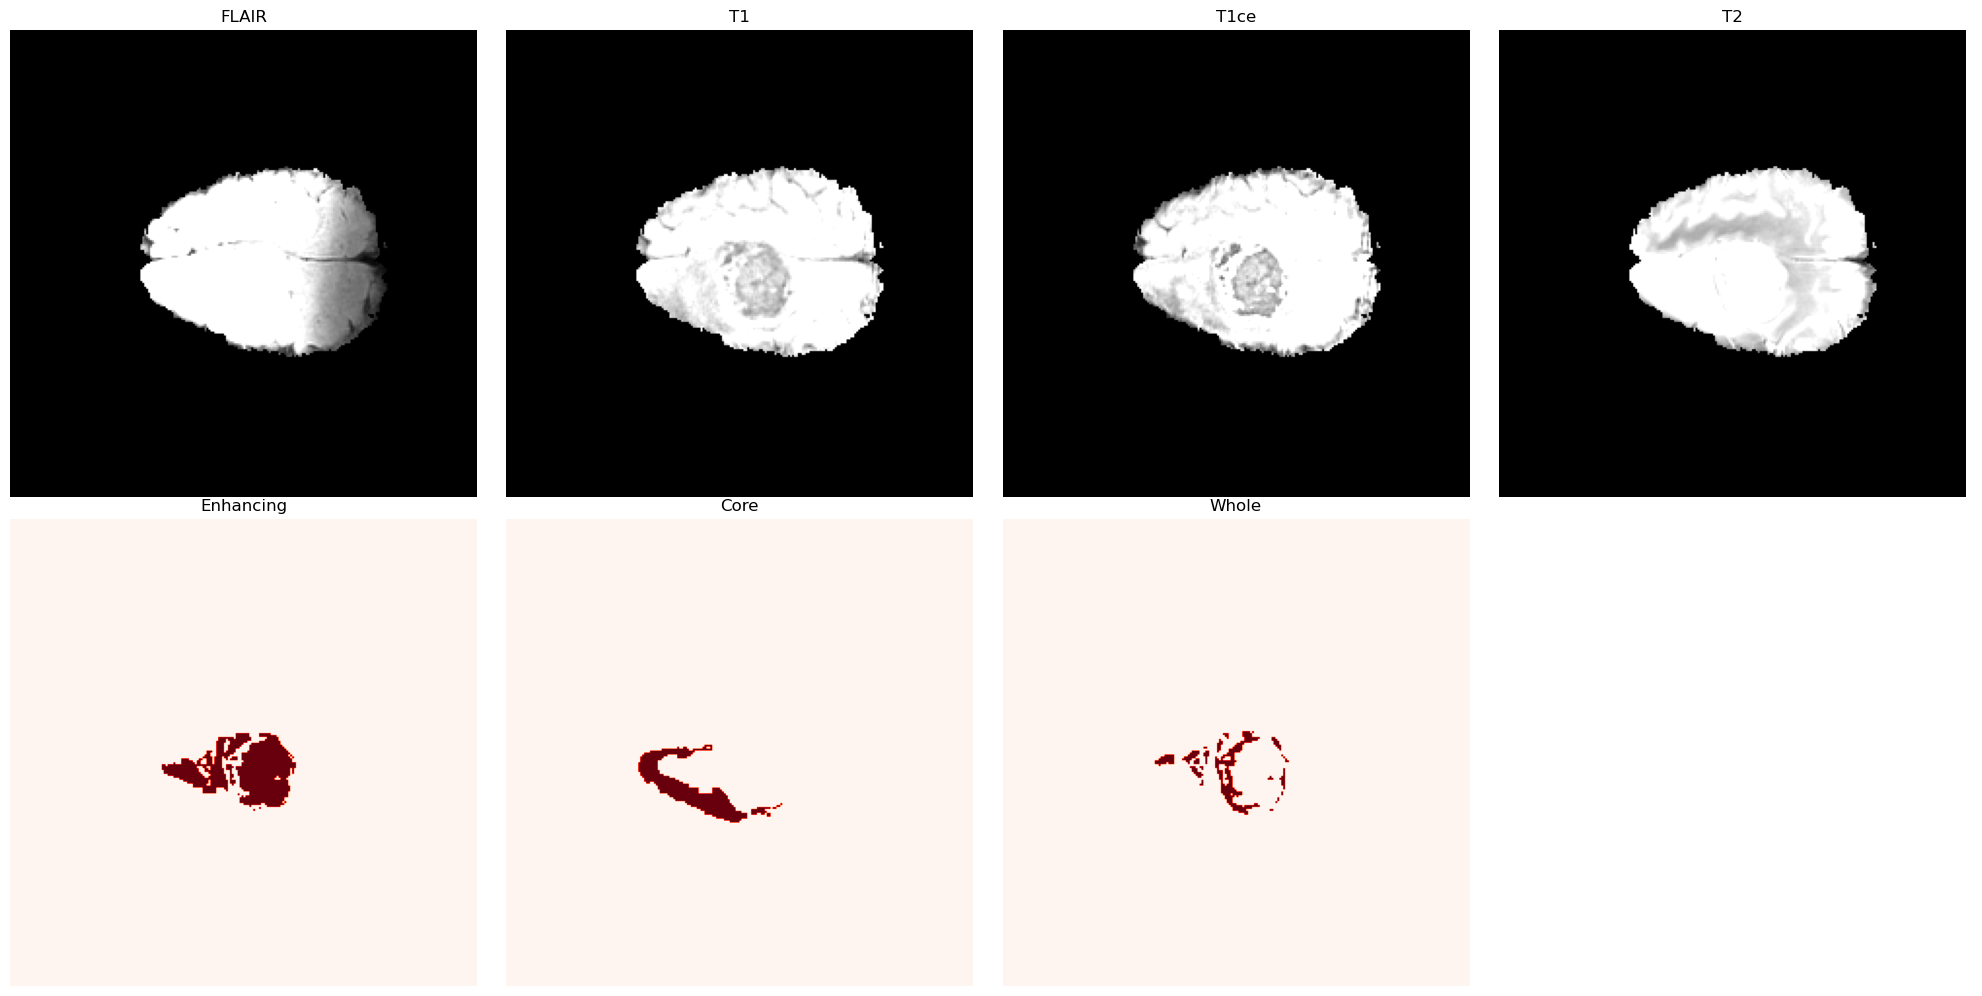

In [40]:
import matplotlib.pyplot as plt

def rescale_img_for_display(img, clip_min=-2, clip_max=2):
    """
    Rescale normalized MRI image to [0,1] for display.
    Clip values to avoid extreme outliers affecting brightness.
    """
    img = img.clip(clip_min, clip_max)
    img = (img - clip_min) / (clip_max - clip_min)
    return img

# Get one batch from the train_loader
images, masks = next(iter(train_loader))
batch_idx = 0

image = images[batch_idx]  # (4, H, W)
mask = masks[batch_idx]    # (3, H, W)

modality_names = ['FLAIR', 'T1', 'T1ce', 'T2']
mask_names = ['Enhancing', 'Core', 'Whole']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot MRI modalities
for i in range(4):
    img_disp = rescale_img_for_display(image[i].numpy())
    axes[0, i].imshow(img_disp, cmap='gray')
    axes[0, i].set_title(modality_names[i])
    axes[0, i].axis('off')

# Plot mask channels
for i in range(3):
    axes[1, i].imshow(mask[i].numpy(), cmap='Reds')
    axes[1, i].set_title(mask_names[i])
    axes[1, i].axis('off')

axes[1, 3].axis('off')
plt.tight_layout()
plt.show()


# Applying Gaussian noise

Train: 40036 | Val: 8579 | Test: 8580


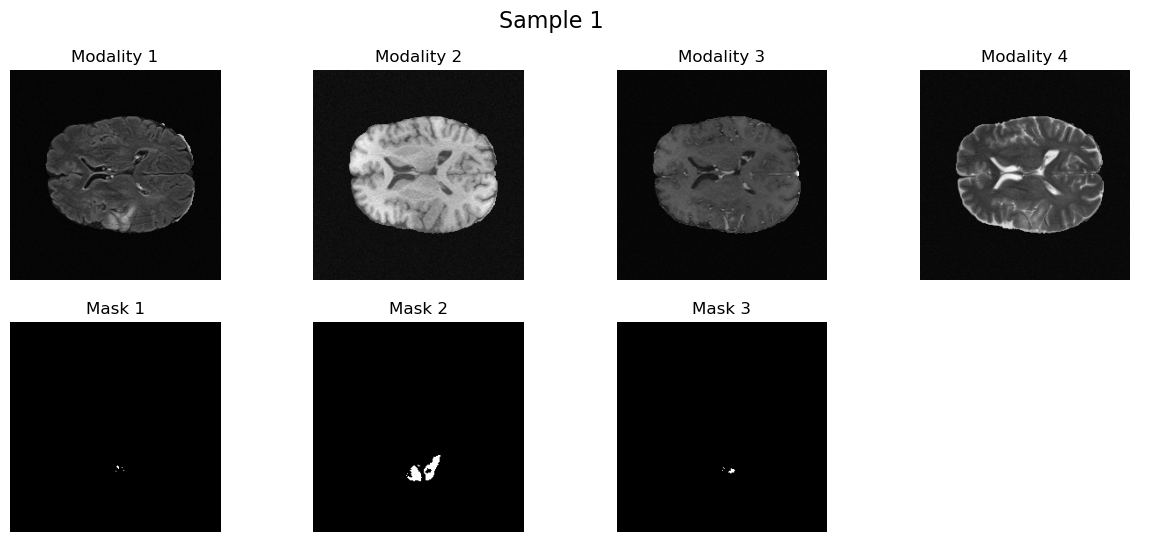

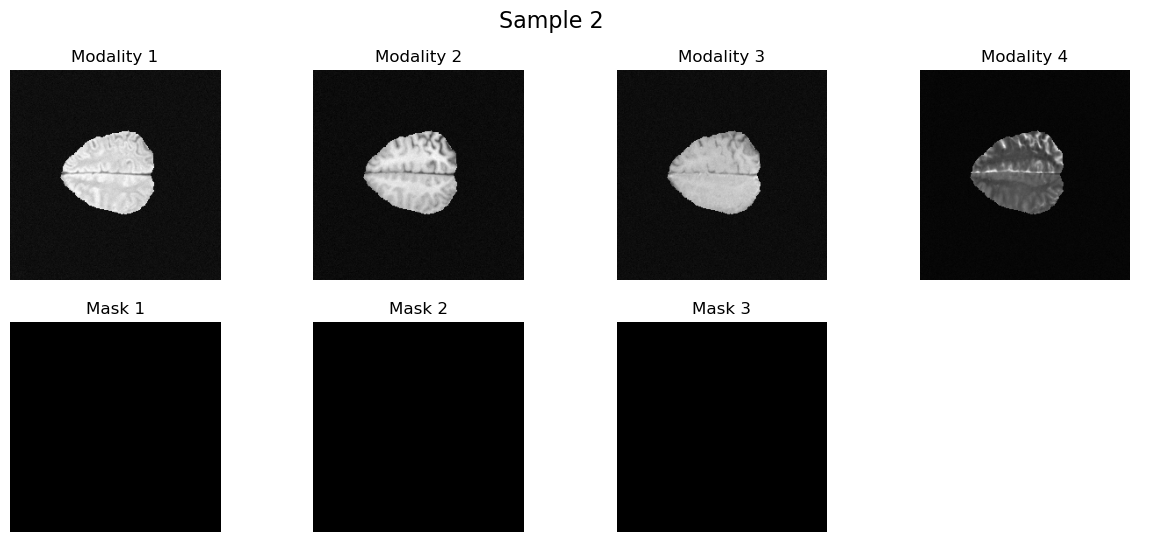

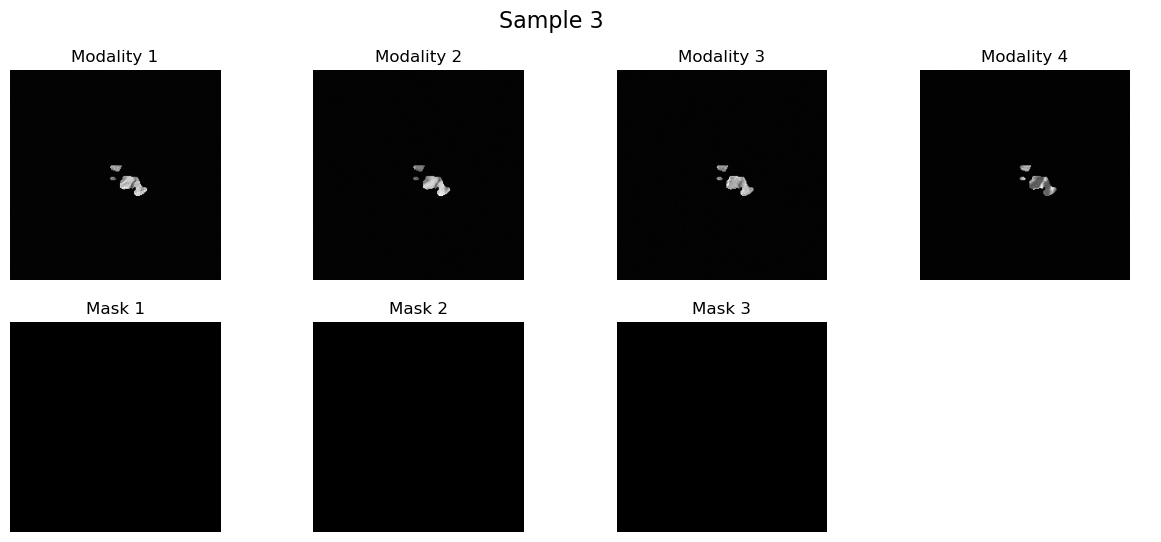

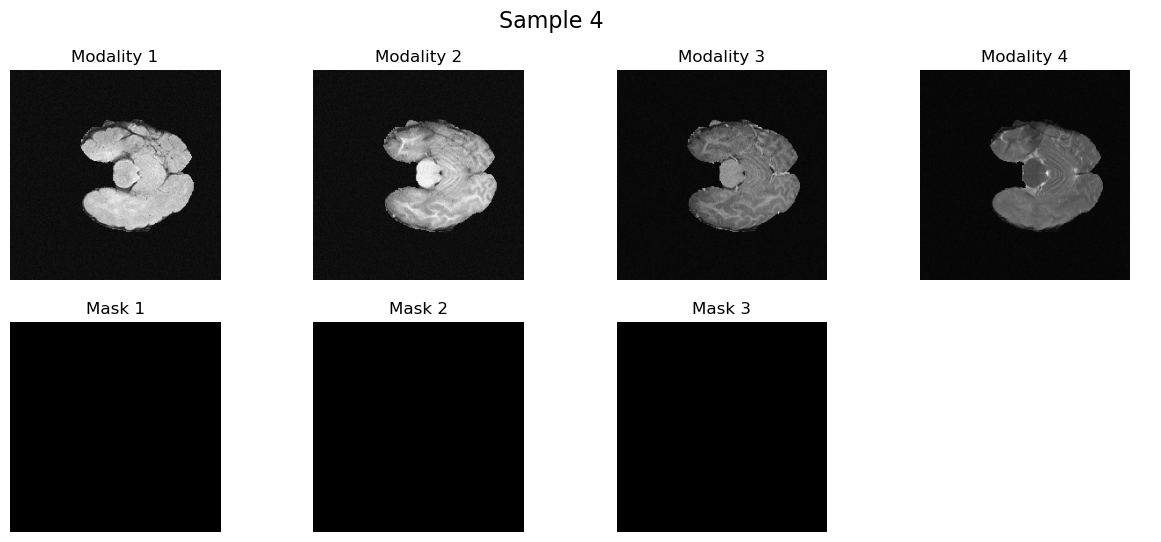

In [46]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# -------------------------------
# Paths
# -------------------------------
data_dir = r"D:\Downloads\BrainTumorSegmebtation\preprocessed_npz"

# Load train/val/test splits
import pickle
with open(os.path.join(data_dir, 'train_files.pkl'), 'rb') as f:
    train_files = pickle.load(f)
with open(os.path.join(data_dir, 'val_files.pkl'), 'rb') as f:
    val_files = pickle.load(f)
with open(os.path.join(data_dir, 'test_files.pkl'), 'rb') as f:
    test_files = pickle.load(f)

print(f"Train: {len(train_files)} | Val: {len(val_files)} | Test: {len(test_files)}")

# -------------------------------
# Gaussian Noise Transform
# -------------------------------
class GaussianNoise(object):
    def __init__(self, mean=0., std=0.05):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        return tensor + noise

# -------------------------------
# Dataset
# -------------------------------
class BrainTumorTorchDataset(Dataset):
    def __init__(self, data_dir, file_list, transform=None):
        self.data_dir = data_dir
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, 4)
        mask = data['mask']            # shape: (H, W, 3)

        # Convert to torch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # (C, H, W)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)     # (C_mask, H, W)

        if self.transform:
            image = self.transform(image)  # only apply to image

        return image, mask

# -------------------------------
# Create datasets & loaders
# -------------------------------
transform = GaussianNoise(0., 0.05)
batch_size = 4

train_dataset = BrainTumorTorchDataset(data_dir, train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------------
# Visualize one batch
# -------------------------------
images, masks = next(iter(train_loader))  # get first batch

for i in range(batch_size):
    fig, axs = plt.subplots(2, 4, figsize=(15, 6))
    fig.suptitle(f"Sample {i+1}", fontsize=16)

    # Plot 4 MRI modalities
    for j in range(4):
        axs[0, j].imshow(images[i, j].numpy(), cmap='gray')
        axs[0, j].set_title(f'Modality {j+1}')
        axs[0, j].axis('off')

    # Plot tumor masks
    for j in range(3):
        axs[1, j].imshow(masks[i, j].numpy(), cmap='gray')
        axs[1, j].set_title(f'Mask {j+1}')
        axs[1, j].axis('off')

    # Hide last subplot
    axs[1, 3].axis('off')
    plt.show()


# Applying Motion Blur

Here, each row shows one MRI scan with its four modalities (T1, T1c, T2, FLAIR) after applying a **motion blur augmentation**, making the images look slightly smeared to mimic patient movement. This helps train the model to be robust against noisy or blurred scans. The last column shows the **tumor mask**, which remains unblurred to preserve the ground-truth labels.


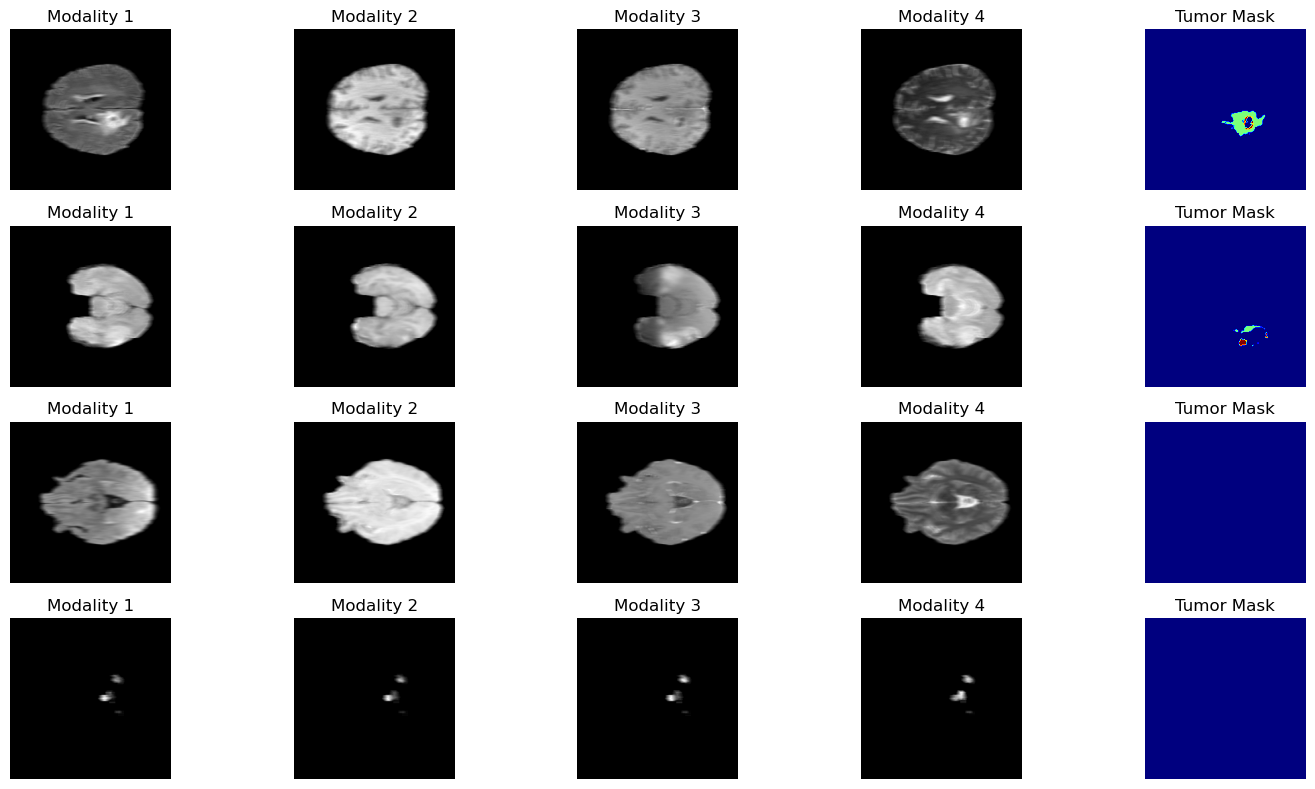

In [54]:
import cv2

# Custom Motion Blur Transform
class MotionBlur(object):
    def __init__(self, kernal_size = 5):
        # The kernal size detrmines the blur strength
        self.kernal_size = kernal_size
    def __call__(self, tensor):
        # converting the numpy tensor into numpy array to use them in cv2
        img = tensor.numpy()
        # apply motion blur to each channel separately
        for c in range(img.shape[0]):
            #making a 2d of empty kernal
            k = np.zeros((self.kernal_size, self.kernal_size))
            # picking the middle row of the kernal
            k[self.kernal_size // 2, :] = np.ones(self.kernal_size)
            k = k / self.kernal_size  # normalize kernel
            # Apply concolution

            img[c] = cv2.filter2D(img[c], -1, k)
            
        return torch.from_numpy(img)  # ✅ return the tensor!   
# ---------- Dataset ----------
class BrainTumorTorchDataset(torch.utils.data.Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # (C, H, W)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)     # (C_mask, H, W)

        if self.transform:
            image = self.transform(image)

        return image, mask
      
batch_size= 4
transform = MotionBlur(kernal_size=9)

train_dataset = BrainTumorTorchDataset(train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size= batch_size, shuffle= True)



# ---------- Visualize one batch ----------
images, masks = next(iter(train_loader))

fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):  # 4 MRI modalities
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()

# Apply Downsampling


This code simulates **low-resolution MRI scans** by downsampling and then upsampling each image, introducing blur. It loads images and tumor masks using `BrainTumorTorchDataset` and applies the transform only to the images. The output is visualized in a **grid of 4 rows × 5 columns** (4 patients per batch). In each row, **columns 1–4** show the four MRI modalities (T1, T1c, T2, FLAIR) after degradation, and **column 5** shows the corresponding **tumor segmentation mask** in color.


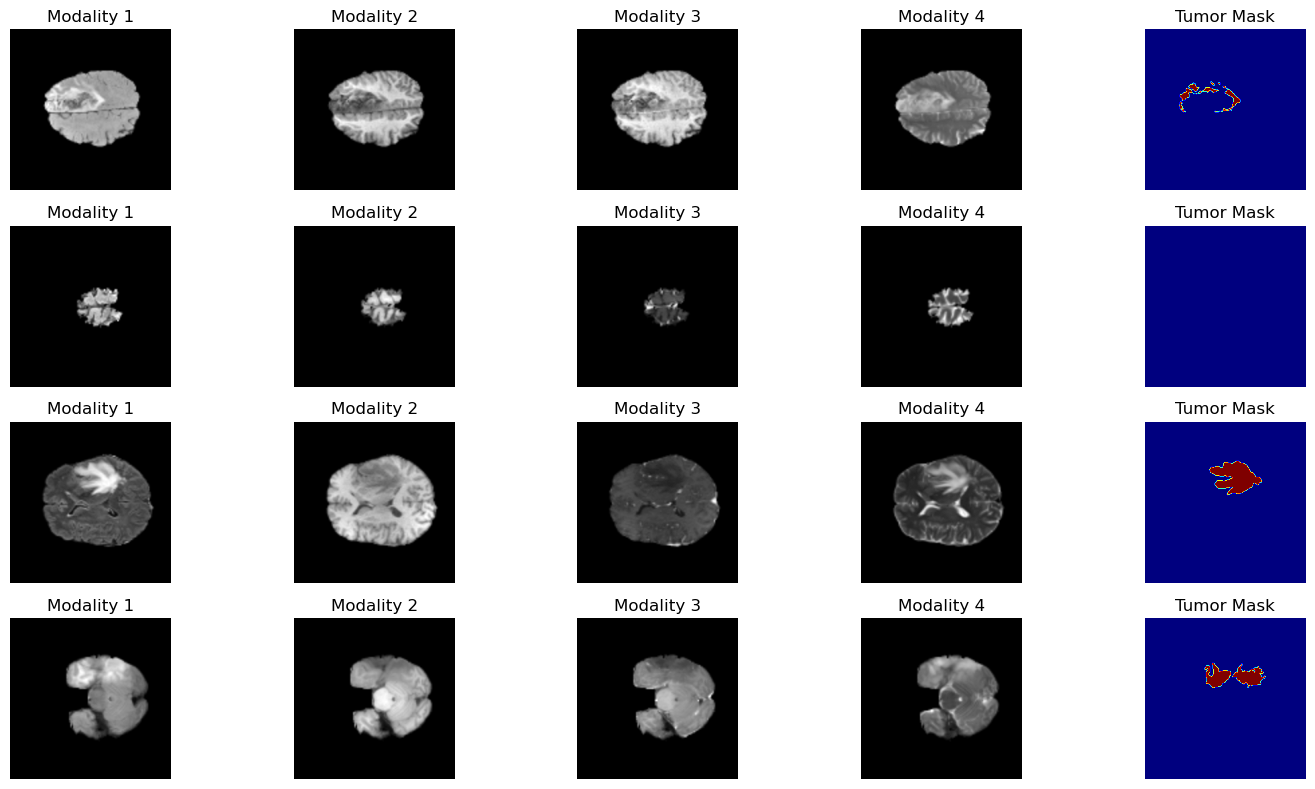

In [58]:
class DownUpSample(object):
    """
    Simulates low-resolution acquisition:
    1. Downsample the image to a smaller size.
    2. Upsample back to original size (introduces blur/aliasing artifacts).
    """
    def __init__(self, downscale_factor=2):
        #downscale factor determines how much smaller the image will be
        self.downscale_factor = downscale_factor # the image will be halved

    def __call__(self, tensor):
        #convert the tensor to numpy array
        img = tensor.numpy()
        C, H, W = img.shape

        # Downsample and unsample

        for c in range(C):
            # Downsample
            small = cv2.resize(img[c], (W // self.downscale_factor, H // self.downscale_factor), interpolation=cv2.INTER_LINEAR)

            # Unsample
            img[c] = cv2.resize(small, (W,H), interpolation= cv2.INTER_LINEAR)

            # Linear interpolation (bilinear) is the default for upscaling/downscaling.
            # Works by taking a weighted average of the 4 nearest pixels to compute the new pixel value.

         #convert back to torch tensor

        return  torch.from_numpy(img).float()


# -------------------------------
# Dataset
# -------------------------------
class BrainTumorTorchDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to torch tensor and reorder channels
        image = torch.from_numpy(image).float().permute(2, 0, 1)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)

        # Apply degradation if provided
        if self.transform:
            image = self.transform(image)

        return image, mask

# -------------------------------
# Visualize Downsampled MRI Batch
# -------------------------------
batch_size = 4
transform = DownUpSample(downscale_factor=2)  # Downscale by 2

train_dataset = BrainTumorTorchDataset(train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

images, masks = next(iter(train_loader))

fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):  # 4 MRI modalities
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()        
        
        

# Applying ContrastShift

This code loads a batch of brain MRI scans and applies contrast enhancement using **CLAHE** via the **ContrastShift** transform. Each image has 4 MRI modalities, which are displayed in the first 4 columns of the output, showing the enhanced local contrast for each modality. The 5th column shows the tumor mask, where different tumor regions are color-coded using the jet colormap. The output allows visualization of how contrast enhancement affects each MRI modality while preserving the tumor structure.

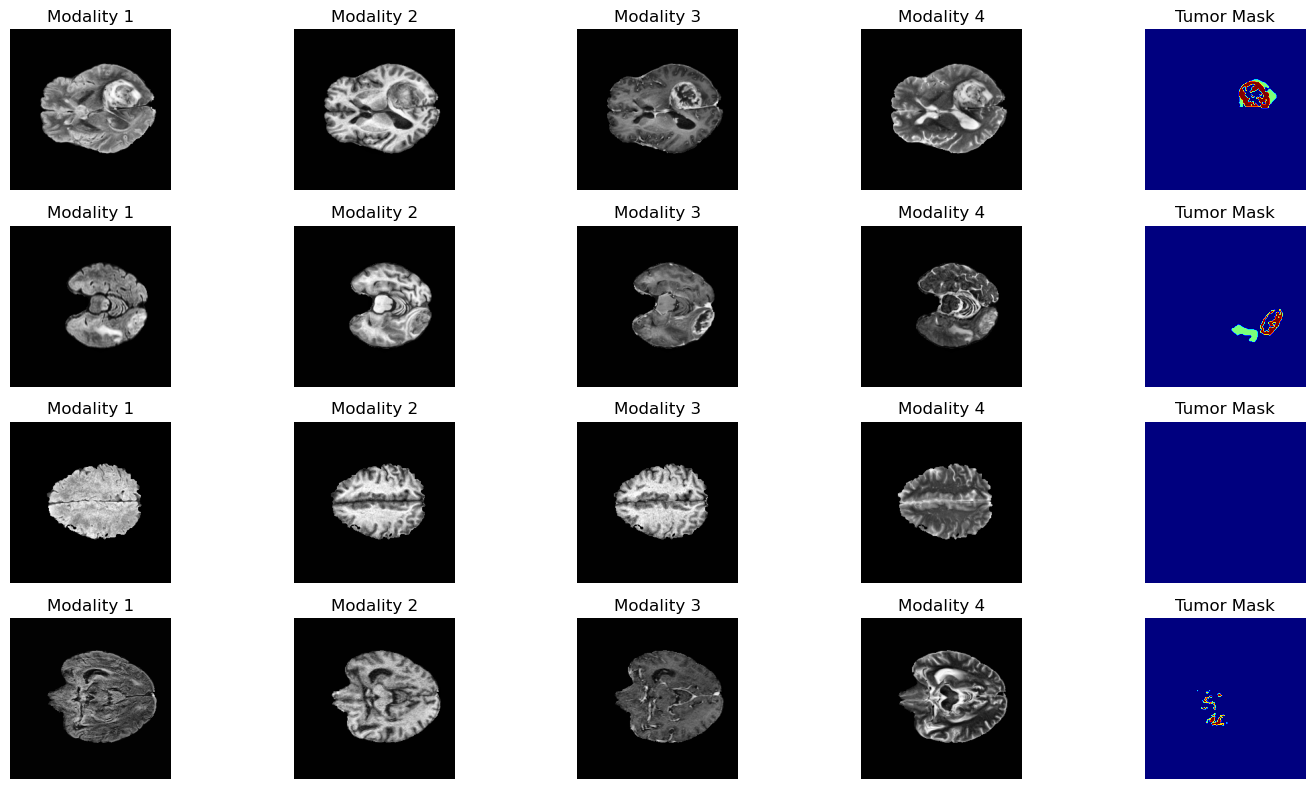

In [64]:
class ContrastShift(object):
    """
    Simulates scanner contrast variations using CLAHE.
    CLAHE enhances local contrast while preventing over-amplification.
    """
    def __init__(self, clip_limit=2.0, tile_grid_size=(8,8)):
        self.clip_limit = clip_limit
        self.tile_grid_size = tile_grid_size

        # clip_limit limits contrasrt amplicfication
        # title _grid_size dividrs the image into a 8*8 grid

    def __call__(self, tensor):
        img = tensor.numpy()
        C, H, W = img.shape

        for c in range(C):
            # converts to unit8 for CLAHE
            channel = img[c]
            eps = 1e-8
            channel = ((channel - channel.min()) / (channel.max() - channel.min() + eps) * 255).astype(np.uint8)


            # Apply clahe
            clahe = cv2.createCLAHE(clipLimit = self.clip_limit, tileGridSize = self.tile_grid_size)
            channel = clahe.apply(channel)

            # Back to float32 normalized [0,1]
            channel = channel.astype(np.float32) / 255.0
            img[c] = channel

        return torch.from_numpy(img).float()
        
 
# -------------------------------
# Dataset
# -------------------------------
class BrainTumorTorchDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to torch tensor
        image = torch.from_numpy(image).float().permute(2, 0, 1)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)

        if self.transform:
            image = self.transform(image)

        return image, mask

# -------------------------------
# Visualize a batch with Contrast Shift
# -------------------------------
batch_size = 4
transform = ContrastShift(clip_limit=2.0)

train_dataset = BrainTumorTorchDataset(train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

images, masks = next(iter(train_loader))

fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()


# Aplying Poisson noise

This code loads MRI images and tumor masks from .npz files, applies **Poisson** noise to simulate realistic intensity variations, and converts them to **PyTorch tensors**. Each batch shows**4 columns of MRI modalities** with added noise and **1 column of the tumor mask**. Brighter pixels fluctuate more than darker ones, making the dataset more robust for model training. The final visualization displays the noisy images alongside their corresponding masks.

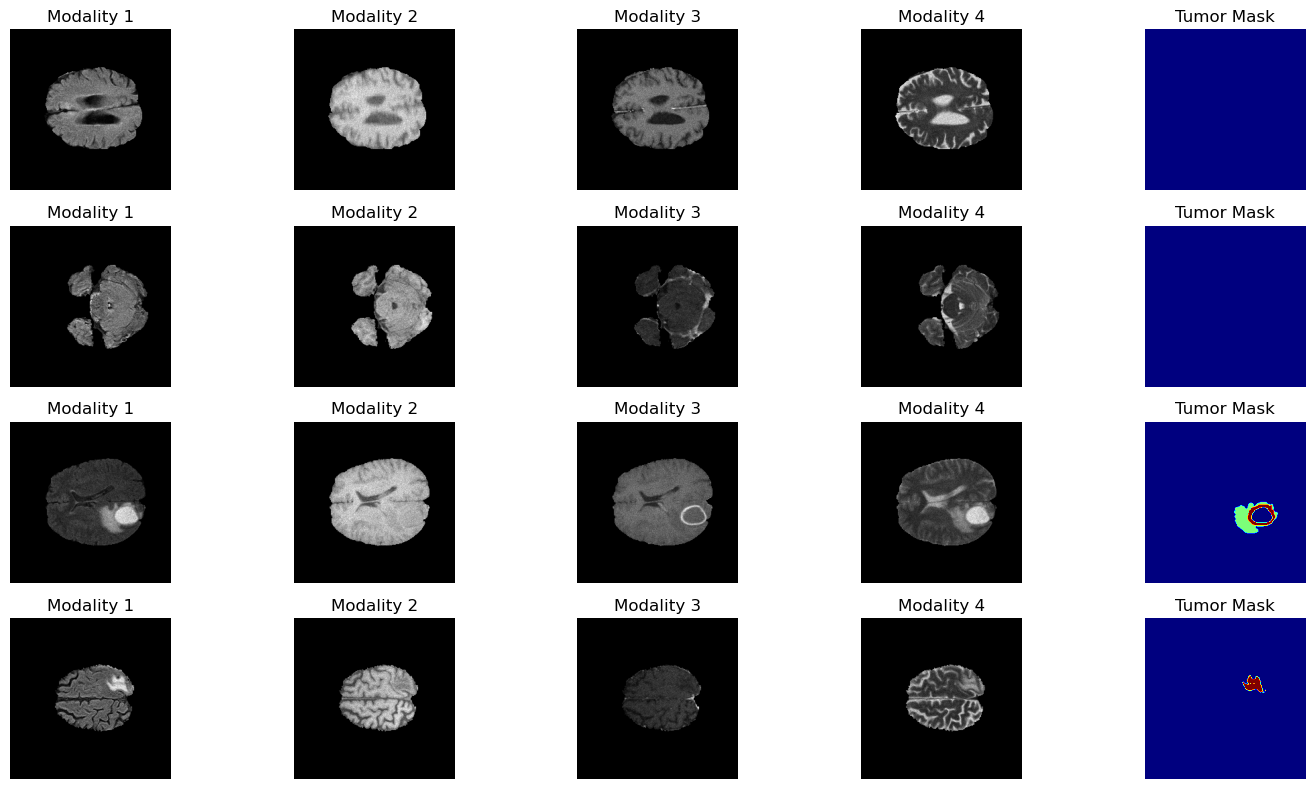

In [72]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# ---------- Custom Poisson Noise Transform ----------
class PoissonNoise(object):
    """
    Applies Poisson noise to an image tensor.
    Poisson noise is proportional to the pixel intensity.
    """
    def __call__(self, tensor):
        img = tensor.numpy()
        for c in range(img.shape[0]):
            # Shift values to be non-negative
            vals = img[c] - img[c].min()  
            # Scale to higher counts
            vals = vals / vals.max() * 255  
            noisy = np.random.poisson(vals).astype(np.float32)
            # Rescale back to original range
            noisy = noisy / 255.0 * (img[c].max() - img[c].min()) + img[c].min()
            img[c] = noisy
        return torch.from_numpy(img)


# ---------- Dataset ----------
class BrainTumorTorchDataset(torch.utils.data.Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # (C, H, W)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)     # (C_mask, H, W)

        # Apply transform if any
        if self.transform:
            image = self.transform(image)

        return image, mask

# ---------- Load Dataset ----------
batch_size = 4
poisson_transform = PoissonNoise()

train_dataset = BrainTumorTorchDataset(train_files, transform=poisson_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# ---------- Visualize one batch ----------
images, masks = next(iter(train_loader))

fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):  # 4 MRI modalities
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()


# Apply Bit-Depth Reduction Transform

This code applies **bit-depth reduction** to MRI images to simulate older scanners, reducing the number of intensity levels (e.g., from 256 to 16). Each image channel is normalized, quantized to the desired levels, and then rescaled back to the original intensity range. The `BrainTumorTorchDataset` loads images and masks from `.npz` files, applies the transform, and returns PyTorch tensors. The output visualization shows a batch of images with four MRI modalities in the first four columns and the corresponding tumor mask in the fifth column.


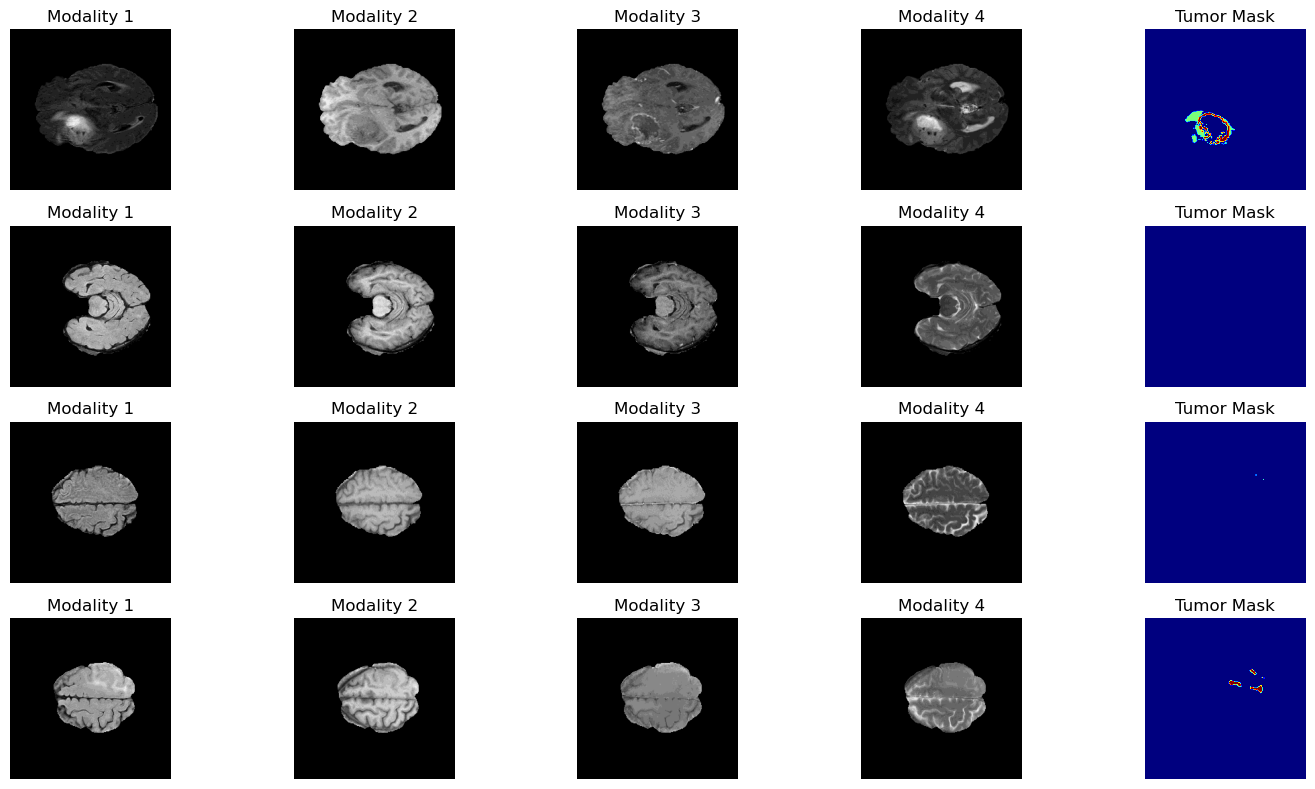

In [83]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Bit-Depth Reduction Transform
# -------------------------------
class BitDepthReduction(object):
    """
    Reduce bit-depth of image to simulate older scanners.
    E.g., 8-bit (256 levels) → 4-bit (16 levels).
    """
    def __init__(self, bits=4):
        self.bits = bits
        self.levels = 2 ** bits  # Number of intensity levels

    def __call__(self, tensor):
        img = tensor.numpy()
        for c in range(img.shape[0]):
            # Normalize channel to [0, 1]
            channel = img[c]
            min_val = channel.min()
            max_val = channel.max()
            norm = (channel - min_val) / (max_val - min_val + 1e-8)
            
            # Quantize to desired levels
            norm = np.floor(norm * (self.levels - 1)) / (self.levels - 1)
            
            # Rescale back to original range
            img[c] = norm * (max_val - min_val) + min_val
        
        return torch.from_numpy(img)

# -------------------------------
# Dataset
# -------------------------------
class BrainTumorTorchDataset(torch.utils.data.Dataset):
    """
    PyTorch Dataset for Brain Tumor Segmentation using .npz files.
    """
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # (C, H, W)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)     # (C_mask, H, W)

        # Apply transform if any
        if self.transform:
            image = self.transform(image)

        return image, mask

# -------------------------------
# Usage
# -------------------------------
batch_size = 4

# Apply bit-depth reduction to images
transform = BitDepthReduction(bits=4)

# Create dataset and dataloader
train_dataset = BrainTumorTorchDataset(train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Visualize one batch
images, masks = next(iter(train_loader))
fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):  # 4 MRI modalities
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()


# Histogram Clipping Transform


This code applies **histogram clipping** to MRI images to simulate low dynamic range or reduced contrast, typical of older scanners. Each image channel is clipped between the 5th and 95th percentiles and then normalized to \[0, 1]. The `BrainTumorTorchDataset` loads the images and tumor masks from `.npz` files, applies the transform, and returns PyTorch tensors. The output visualization shows a batch of images with four MRI modalities in the first four columns and the corresponding tumor mask in the fifth column.


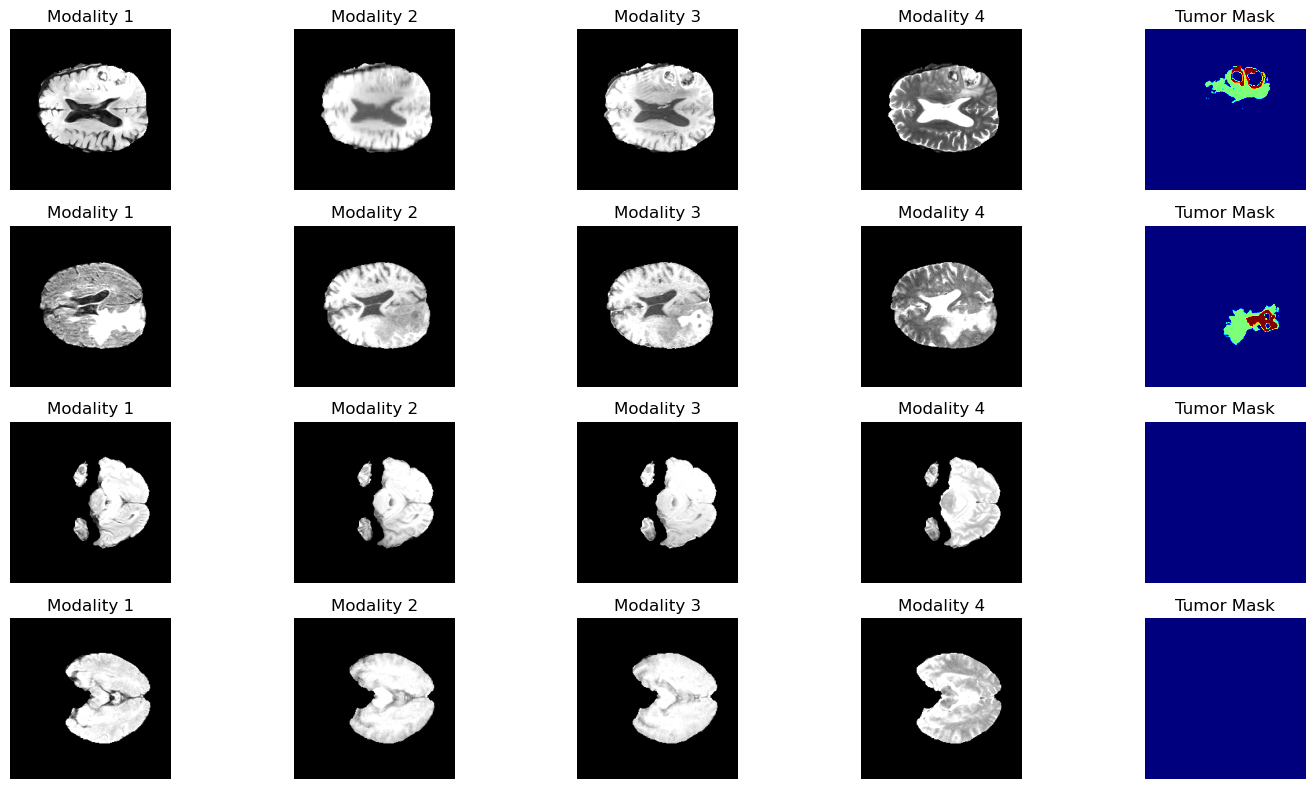

In [91]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Histogram Clipping Transform
# -------------------------------
class HistogramClipping(object):
    """
    Clip image intensities to a specified percentile range.
    Simulates low dynamic range or contrast in old scanners.
    """
    def __init__(self, lower_percentile=5, upper_percentile=95):
        self.lower = lower_percentile
        self.upper = upper_percentile

    def __call__(self, tensor):
        img = tensor.numpy()
        for c in range(img.shape[0]):
            channel = img[c]
            # Get intensity thresholds
            low = np.percentile(channel, self.lower)
            high = np.percentile(channel, self.upper)
            # Clip and normalize
            channel = np.clip(channel, low, high)
            channel = (channel - low) / (high - low + 1e-8)  # scale to [0, 1]
            img[c] = channel
        return torch.from_numpy(img)

# -------------------------------
# Dataset
# -------------------------------
class BrainTumorTorchDataset(torch.utils.data.Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']
        mask = data['mask']

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)

        if self.transform:
            image = self.transform(image)

        return image, mask

# -------------------------------
# Usage
# -------------------------------
batch_size = 4

# Apply histogram clipping
transform = HistogramClipping(lower_percentile=5, upper_percentile=95)

train_dataset = BrainTumorTorchDataset(train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Visualize one batch
images, masks = next(iter(train_loader))
fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):  # 4 MRI modalities
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()


# Bias Field Simulation

This code applies bias field simulation to MRI images, introducing smooth, low-frequency intensity variations to mimic the **inhomogeneity** seen in real scanners. Each pixel intensity is multiplied by a **smoothly varying polynomial field**, making some regions brighter and others darker. The dataset loader applies this transform to all MRI modalities, and the visualization shows a batch with **four MRI channels per row**, with the fifth column displaying the corresponding tumor mask. This helps train models to be robust to scanner intensity variations

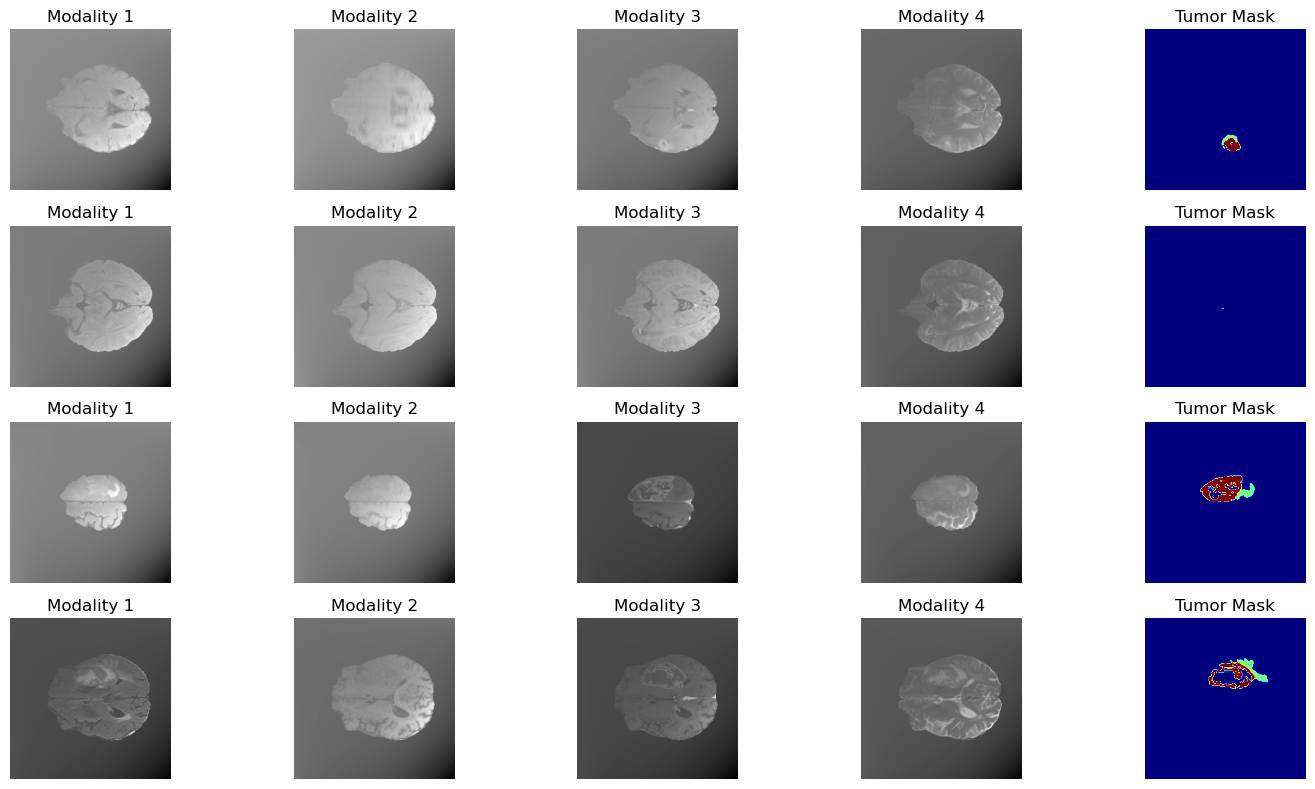

In [97]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# ---------- Custom Bias Field Transform ----------
class BiasField(object):
    """
    Simulate MRI bias field (low-frequency intensity inhomogeneity).
    Makes some regions brighter/darker to mimic old MRI scanners.
    """
    def __init__(self, coeff_range=(0.5, 1.5), order=3):
        """
        Args:
            coeff_range (tuple): Min and max coefficient multiplier for intensity
            order (int): Order of polynomial for smooth bias field
        """
        self.coeff_range = coeff_range
        self.order = order

    def __call__(self, tensor):
        # tensor shape: (C, H, W)
        img = tensor.numpy()
        H, W = img.shape[1], img.shape[2]

        # Create polynomial meshgrid
        y = np.linspace(-1, 1, H)
        x = np.linspace(-1, 1, W)
        xv, yv = np.meshgrid(x, y)

        # Random polynomial coefficients
        coeffs = np.random.uniform(self.coeff_range[0], self.coeff_range[1],
                                   size=(self.order+1, self.order+1))

        # Build bias field
        bias = np.zeros((H, W))
        for i in range(self.order+1):
            for j in range(self.order+1):
                bias += coeffs[i, j] * (xv**i) * (yv**j)

        # Normalize bias field to around 1
        bias = bias / np.mean(bias)

        # Apply to each channel
        for c in range(img.shape[0]):
            img[c] = img[c] * bias

        return torch.from_numpy(img).float()


# ---------- Dataset & Loader ----------
class BrainTumorTorchDataset(torch.utils.data.Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # (C, H, W)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)     # (C_mask, H, W)

        if self.transform:
            image = self.transform(image)

        return image, mask


# ---------- Usage ----------
batch_size = 4
transform = BiasField(coeff_range=(0.7, 1.3), order=3)

train_dataset = BrainTumorTorchDataset(train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# ---------- Visualize one batch ----------
images, masks = next(iter(train_loader))

fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):  # 4 MRI modalities
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()


# Ring/Stripe Artifacts Simulation

This transform simulates common MRI hardware artifacts by introducing **random horizontal and vertical stripes** along image rows and columns and **circular/ring patterns** centered in the image. Stripe intensity is randomly scaled per row/column, while ring artifacts are added as sinusoidal variations in radial distance from the center. The augmented images retain the original MRI modalities and masks but now mimic realistic scanner-induced distortions, helping the model generalize to real-world scans. The output shows a batch of 4 images with 4 modalities per row and the corresponding tumor mask in the last column.

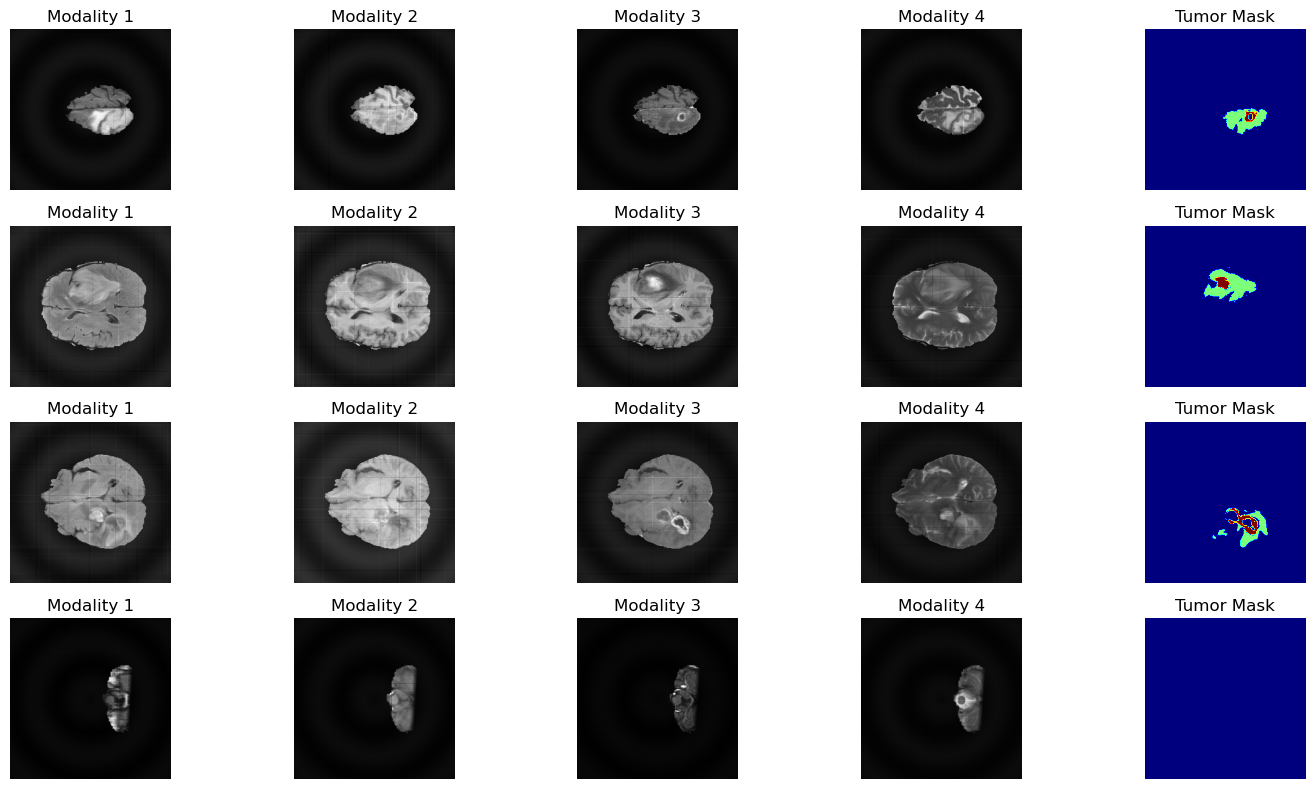

In [104]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# -------------------------------
# Ring/Stripe Artifacts Transform
# -------------------------------
class RingStripeArtifacts(object):
    def __init__(self, stripe_prob=0.05, ring_strength=0.2):
        """
        stripe_prob: fraction of rows/columns affected by stripes
        ring_strength: maximum intensity variation for rings
        """
        self.stripe_prob = stripe_prob
        self.ring_strength = ring_strength

    def __call__(self, tensor):
        img = tensor.clone().numpy()  # shape: (C, H, W)

        C, H, W = img.shape

        # --- Apply Stripe Artifacts ---
        for c in range(C):
            # Random horizontal stripes
            for row in range(H):
                if np.random.rand() < self.stripe_prob:
                    img[c, row, :] *= np.random.uniform(0.7, 1.3)
            # Random vertical stripes
            for col in range(W):
                if np.random.rand() < self.stripe_prob:
                    img[c, :, col] *= np.random.uniform(0.7, 1.3)

        # --- Apply Ring Artifacts ---
        # Create a radial mask
        cx, cy = W // 2, H // 2
        Y, X = np.ogrid[:H, :W]
        r = np.sqrt((X - cx)**2 + (Y - cy)**2)
        r = r / r.max()  # normalize to [0,1]

        for c in range(C):
            img[c] += self.ring_strength * np.sin(5 * np.pi * r)

        return torch.from_numpy(img).float()

# -------------------------------
# Dataset
# -------------------------------
class BrainTumorTorchDataset(torch.utils.data.Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        data = np.load(file_path)
        image = data['image']          # shape: (H, W, C)
        mask = data['mask']            # shape: (H, W, C_mask)

        # Convert to PyTorch tensors
        image = torch.from_numpy(image).float().permute(2, 0, 1)  # (C, H, W)
        mask = torch.from_numpy(mask).long().permute(2, 0, 1)     # (C_mask, H, W)

        # Apply transform if any
        if self.transform:
            image = self.transform(image)

        return image, mask

# -------------------------------
# Usage / Visualization
# -------------------------------
batch_size = 4
transform = RingStripeArtifacts(stripe_prob=0.05, ring_strength=0.2)

# Initialize dataset & dataloader
train_dataset = BrainTumorTorchDataset(train_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Visualize one batch
images, masks = next(iter(train_loader))

fig, axes = plt.subplots(batch_size, 5, figsize=(15, 8))
for i in range(batch_size):
    for c in range(4):  # 4 MRI modalities
        axes[i, c].imshow(images[i, c].numpy(), cmap='gray')
        axes[i, c].axis('off')
        axes[i, c].set_title(f'Modality {c+1}')
    axes[i, 4].imshow(torch.argmax(masks[i], dim=0).numpy(), cmap='jet')
    axes[i, 4].axis('off')
    axes[i, 4].set_title('Tumor Mask')

plt.tight_layout()
plt.show()


# MRI Degradation Simulation Pipeline

This code implements a **degradation simulation pipeline** for MRI brain tumor datasets.
It introduces artifacts such as **noise, motion blur, low resolution, contrast shifts, bit-depth reduction, histogram clipping, bias field, and ring/stripe artifacts**.
A hybrid pipeline randomly applies one or more degradations per image for realistic variability.
The dataset loader handles .npz MRI files with both images and tumor masks.
Degraded images are converted to PyTorch tensors for training.
Visualization shows MRI modalities and tumor mask with applied degradations.
This setup enables training models robust to real-world MRI imperfections.

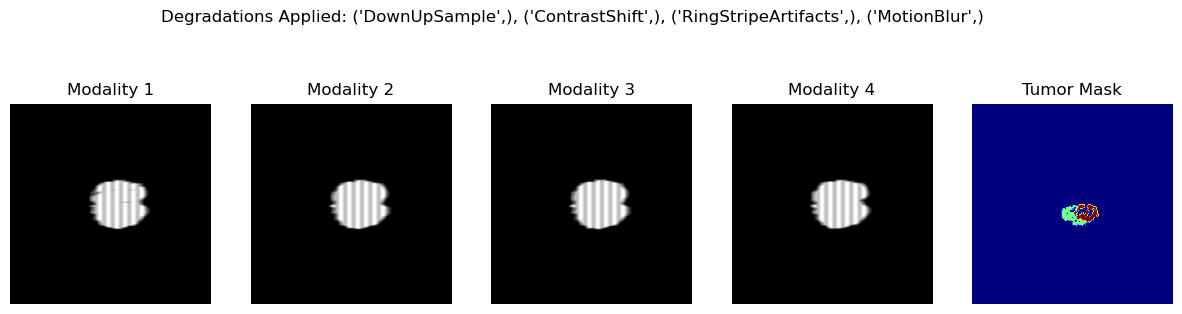

In [113]:
import random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import cv2

# -------------------------------
# Degradation Classes
# -------------------------------
class GaussianNoise:
    def __init__(self, mean=0., std=0.05):
        self.mean = mean
        self.std = std

    def apply(self, img):
        noise = np.random.normal(self.mean, self.std, img.shape)
        return np.clip(img + noise, 0, 1)

class MotionBlur:
    def __init__(self, kernel_size=5):
        self.kernel_size = kernel_size

    def apply(self, img):
        img_copy = img.copy()
        for c in range(img_copy.shape[2]):
            k = np.zeros((self.kernel_size, self.kernel_size))
            k[self.kernel_size // 2, :] = np.ones(self.kernel_size)
            k = k / self.kernel_size
            img_copy[:,:,c] = cv2.filter2D(img_copy[:,:,c], -1, k)
        return img_copy

class DownUpSample:
    def __init__(self, scale_factor=0.5):
        self.scale_factor = scale_factor

    def apply(self, img):
        h, w = img.shape[:2]
        small = cv2.resize(img, (int(w*self.scale_factor), int(h*self.scale_factor)))
        return cv2.resize(small, (w, h))

class ContrastShift:
    def __init__(self, factor=1.2):
        self.factor = factor

    def apply(self, img):
        return np.clip(img * self.factor, 0, 1)

class PoissonNoise:
    def apply(self, img):
        vals = 255 * img
        noisy = np.random.poisson(vals).astype(np.float32)
        return np.clip(noisy / 255., 0, 1)

class BitDepthReduction:
    def __init__(self, bits=4):
        self.bits = bits

    def apply(self, img):
        max_val = 2**self.bits - 1
        img_scaled = np.floor(img * max_val) / max_val
        return img_scaled

class HistogramClipping:
    def __init__(self, clip_limit=0.01):
        self.clip_limit = clip_limit

    def apply(self, img):
        img_copy = img.copy()
        for c in range(img_copy.shape[2]):
            low = np.percentile(img_copy[:,:,c], self.clip_limit*100)
            high = np.percentile(img_copy[:,:,c], 100-self.clip_limit*100)
            img_copy[:,:,c] = np.clip((img_copy[:,:,c]-low)/(high-low),0,1)
        return img_copy

class BiasField:
    def __init__(self, intensity=0.3):
        self.intensity = intensity

    def apply(self, img):
        h, w, c = img.shape
        xx, yy = np.meshgrid(np.linspace(-1,1,w), np.linspace(-1,1,h))
        field = 1 + self.intensity * (xx**2 + yy**2)
        img_copy = img.copy()
        for i in range(c):
            img_copy[:,:,i] *= field
        return np.clip(img_copy,0,1)

class RingStripeArtifacts:
    def __init__(self, stripe_width=5):
        self.stripe_width = stripe_width

    def apply(self, img):
        img_copy = img.copy()
        h, w, c = img.shape
        for i in range(c):
            for x in range(0, w, 2*self.stripe_width):
                img_copy[:, x:x+self.stripe_width, i] *= 0.5
        return img_copy

# -------------------------------
# Hybrid Degradation
# -------------------------------
class HybridDegradation:
    def __init__(self, degradations, probs=None):
        self.degradations = degradations
        # Assign default probability 1.0 if not specified
        self.probs = probs if probs is not None else {k: 1.0 for k in degradations.keys()}

    def apply(self, img, num_degradations=None):
        degraded = img.copy()
        if num_degradations is None:
            num_degradations = random.randint(1, len(self.degradations))

        # Select degradations randomly based on probability
        available = [k for k in self.degradations.keys() if random.random() < self.probs[k]]
        chosen = random.sample(available, min(num_degradations, len(available)))
        random.shuffle(chosen)

        applied_list = []
        for dname in chosen:
            degraded = self.degradations[dname].apply(degraded)
            applied_list.append(dname)
        return degraded, applied_list

# -------------------------------
# Dataset
# -------------------------------
class BrainTumorTorchDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.files = file_list
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        data = np.load(self.files[idx])
        image = data['image']  # (H, W, C)
        mask = data['mask']    # (H, W, C_mask)
        if self.transform:
            image, applied = self.transform.apply(image)
        else:
            applied = []
        image = torch.from_numpy(image).float().permute(2,0,1)  # (C,H,W)
        mask = torch.from_numpy(mask).long().permute(2,0,1)
        return image, mask, applied

# -------------------------------
# Usage Example
# -------------------------------
# Replace with your actual file paths
file_list = ["D:/Downloads/BrainTumorSegmebtation/preprocessed_npz/volume_32_slice_132.npz"]

# All degradations
degradations = {
    "GaussianNoise": GaussianNoise(0.,0.05),
    "MotionBlur": MotionBlur(7),
    "DownUpSample": DownUpSample(0.5),
    "ContrastShift": ContrastShift(1.2),
    "PoissonNoise": PoissonNoise(),
    "BitDepthReduction": BitDepthReduction(4),
    "HistogramClipping": HistogramClipping(0.01),
    "BiasField": BiasField(0.3),
    "RingStripeArtifacts": RingStripeArtifacts(5)
}

# Optional probabilities for each degradation
probs = {k: 0.8 for k in degradations.keys()}

hybrid = HybridDegradation(degradations, probs)

dataset = BrainTumorTorchDataset(file_list, transform=hybrid)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Visualize
# Visualize
for images, masks, applied in loader:
    # Convert image from (C, H, W) to (H, W, C)
    images_np = images[0].permute(1, 2, 0).numpy()

    fig, axes = plt.subplots(1, images_np.shape[2]+1, figsize=(15,4))
    for c in range(images_np.shape[2]):
        axes[c].imshow(images_np[:,:,c], cmap='gray')
        axes[c].axis('off')
        axes[c].set_title(f'Modality {c+1}')
    
    # Tumor mask
    axes[-1].imshow(torch.argmax(masks[0], dim=0).numpy(), cmap='jet')
    axes[-1].axis('off')
    axes[-1].set_title('Tumor Mask')

    # Fix for tuple/str issue in applied degradations
    applied_str = ', '.join([str(a) for a in applied])
    plt.suptitle(f"Degradations Applied: {applied_str}")
    plt.show()



# Visualizing Image Degradations

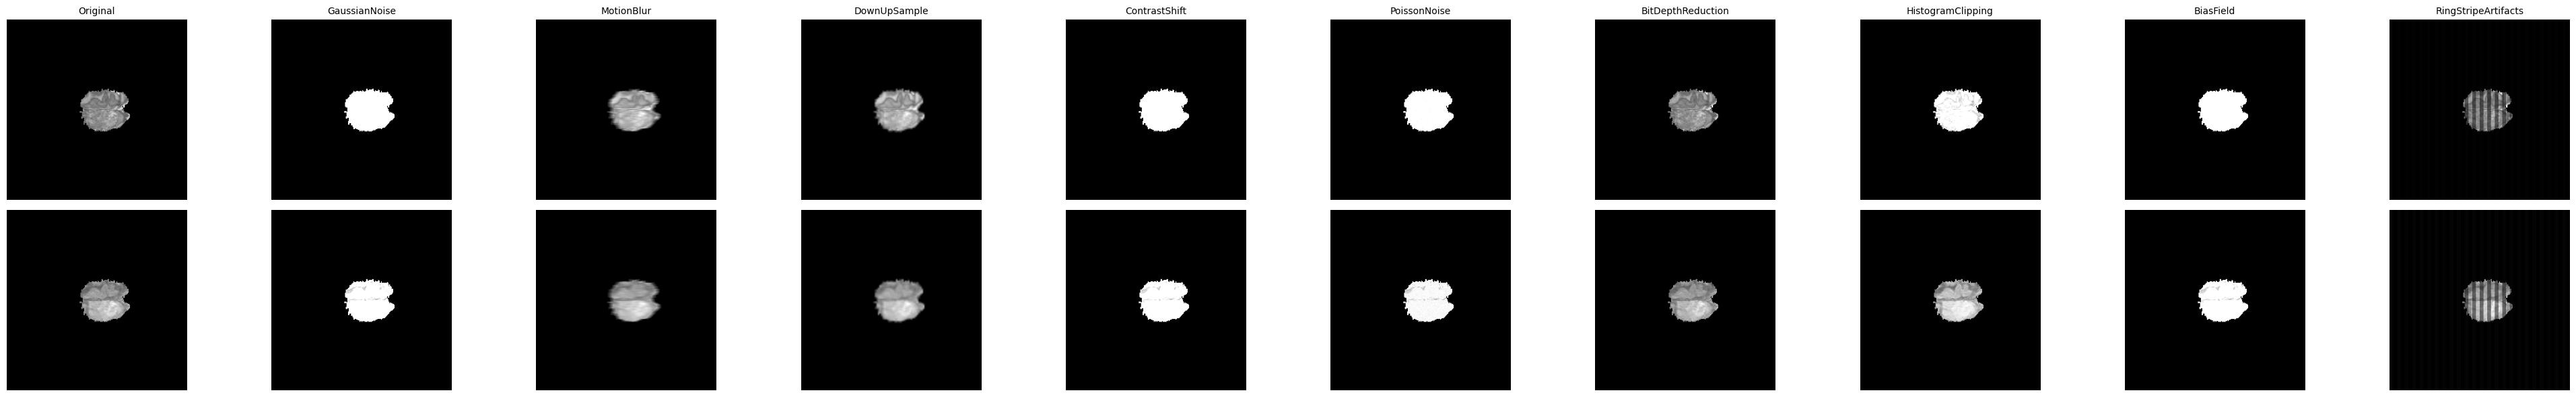

In [125]:
# -------------------------------
# Fixed Poisson Noise Class
# -------------------------------
class PoissonNoise:
    def apply(self, img):
        img_safe = np.clip(img, 0, 1)           # ensure no negative or NaN
        vals = 255 * img_safe
        vals = np.maximum(vals, 0).astype(np.float32)
        noisy = np.random.poisson(vals).astype(np.float32)
        return np.clip(noisy / 255., 0, 1)

# -------------------------------
# Visualization: Original + All Degradations
# -------------------------------
data = np.load(file_list[0])
image_orig = data['image']  # shape: (H, W, C)

# All degradations
degradations = {
    "GaussianNoise": GaussianNoise(0.,0.05),
    "MotionBlur": MotionBlur(7),
    "DownUpSample": DownUpSample(0.5),
    "ContrastShift": ContrastShift(1.2),
    "PoissonNoise": PoissonNoise(),
    "BitDepthReduction": BitDepthReduction(4),
    "HistogramClipping": HistogramClipping(0.01),
    "BiasField": BiasField(0.3),
    "RingStripeArtifacts": RingStripeArtifacts(5)
}

# Collect images and names
all_images = [image_orig]  # original first
all_names = ["Original"]

for name, deg_class in degradations.items():
    all_images.append(deg_class.apply(image_orig.copy()))
    all_names.append(name)

# Number of images
n = len(all_images)

# Create figure
fig, axes = plt.subplots(2, n, figsize=(4*n, 6), squeeze=False)

for i, img in enumerate(all_images):
    # Top row: max projection over channels (all modalities combined)
    axes[0, i].imshow(np.max(img, axis=2), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(all_names[i], fontsize=10)

    # Bottom row: mean projection over channels
    axes[1, i].imshow(np.mean(img, axis=2), cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


# MRI Modalities with Applied Degradations and Tumor Mask

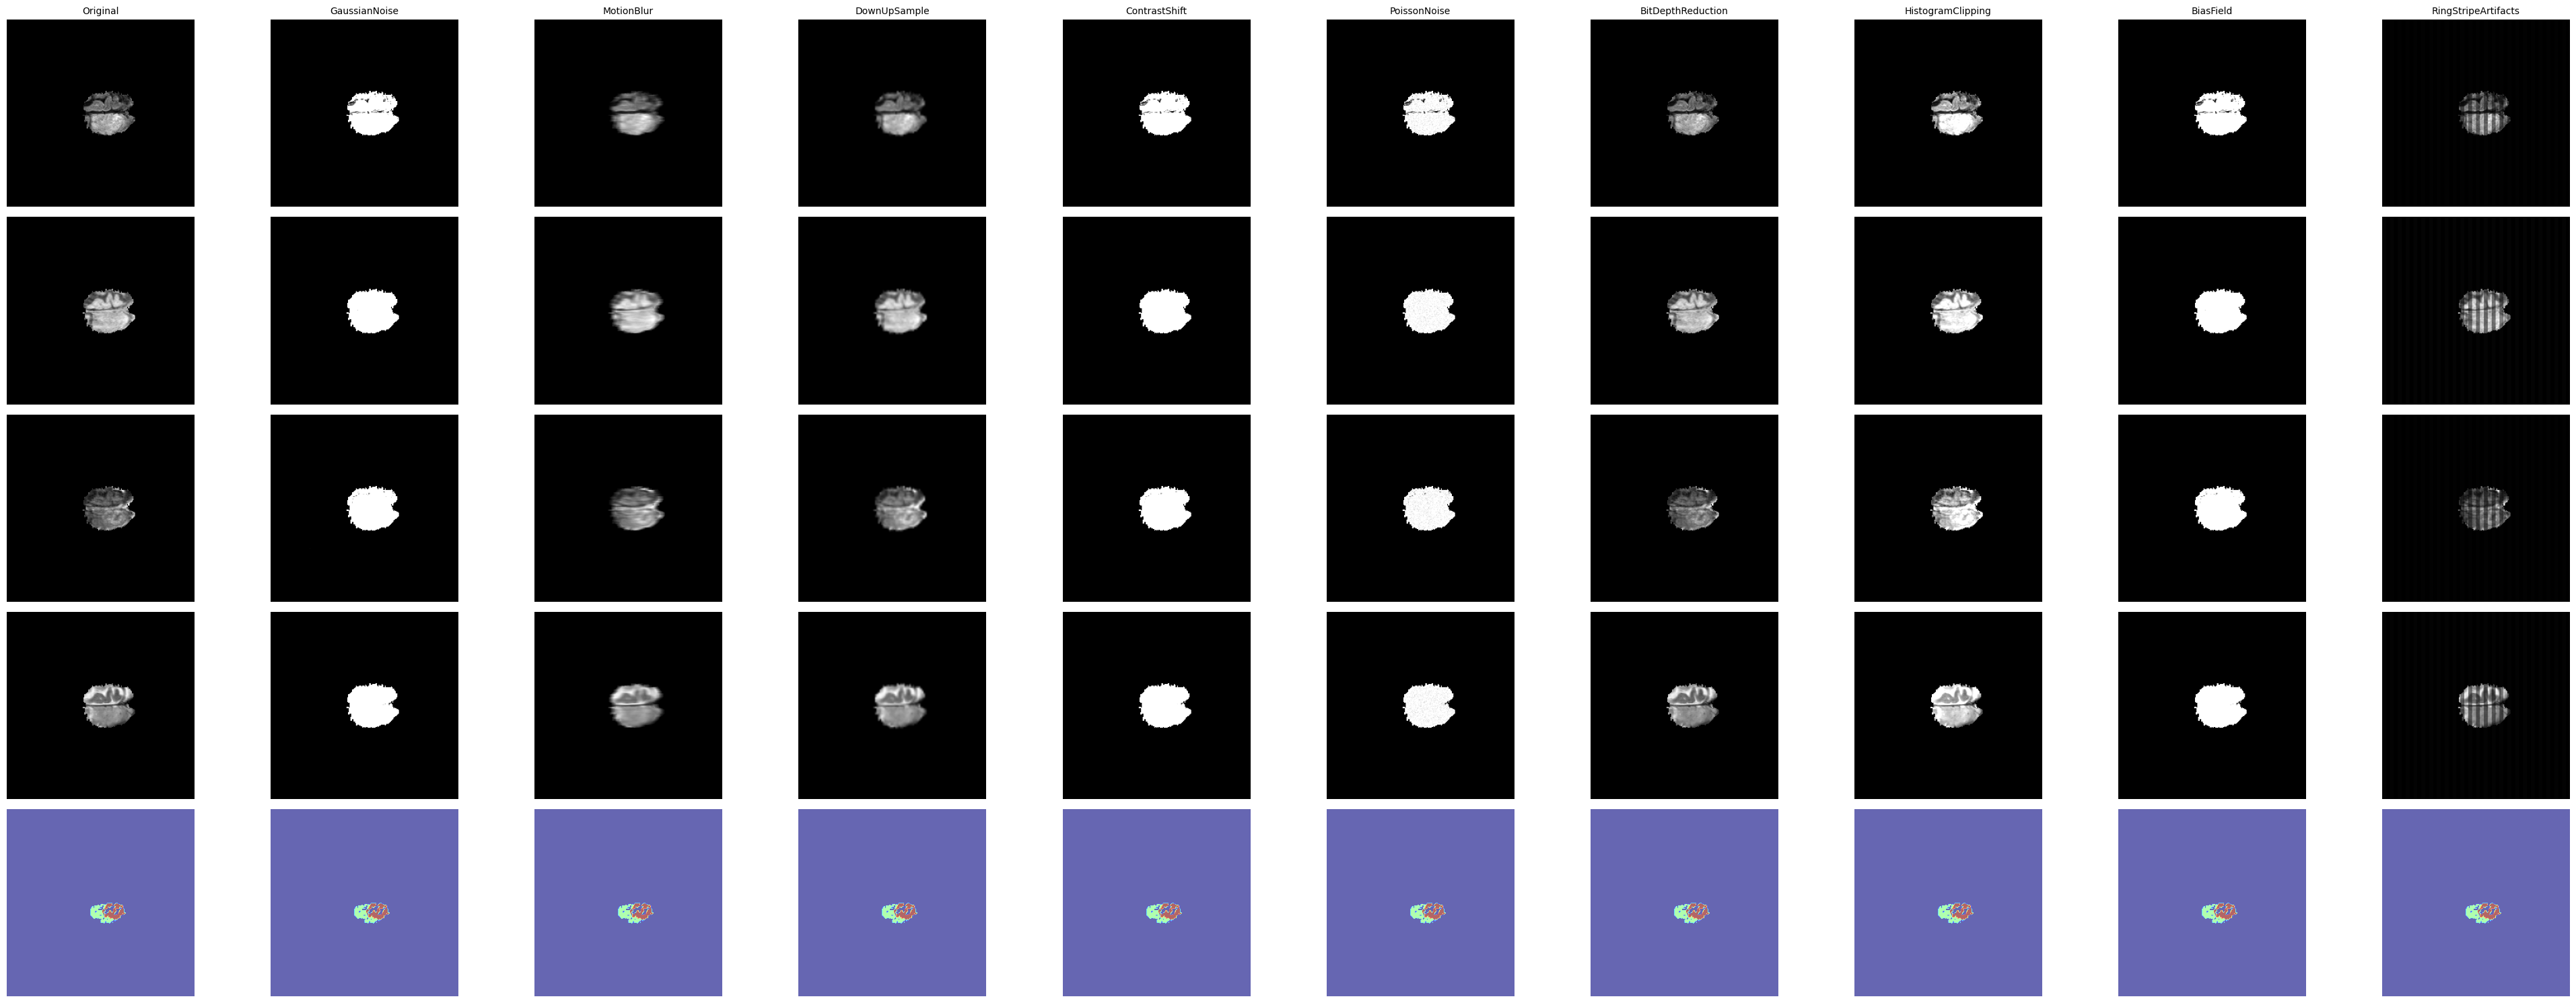

In [127]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Assume `mask` is your tumor mask (H, W, C_mask) from the .npz file
mask = data['mask']  # (H, W, C_mask), C_mask usually 1 for binary

all_images = [image_orig]  # Original first
all_names = ["Original"]

# Apply degradations
for name, deg_class in degradations.items():
    all_images.append(deg_class.apply(image_orig.copy()))
    all_names.append(name)

num_modalities = image_orig.shape[2]
num_versions = len(all_images)

# Add 1 row for tumor mask
fig, axes = plt.subplots(num_modalities + 1, num_versions, figsize=(4*num_versions, 3*(num_modalities+1)))

for col, img in enumerate(all_images):
    # Show MRI modalities
    for row in range(num_modalities):
        axes[row, col].imshow(img[:, :, row], cmap='gray')
        axes[row, col].axis('off')
        if row == 0:
            axes[row, col].set_title(all_names[col], fontsize=10)
    # Show tumor mask (merged across channels if multi-class)
    if mask.shape[2] > 1:
        mask_to_show = np.argmax(mask, axis=2)
    else:
        mask_to_show = mask[:, :, 0]
    axes[-1, col].imshow(mask_to_show, cmap='jet', alpha=0.6)
    axes[-1, col].axis('off')
    if col == 0:
        axes[-1, col].set_ylabel('Tumor Mask', fontsize=10)

plt.tight_layout()
plt.show()
